In [6]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import scipy as sc
import scipy.stats as st
import seaborn as sns
import scipy
import random

from numpy.linalg import matrix_power
from numpy.linalg import solve

from statsmodels.distributions.empirical_distribution import ECDF

matplotlib.style.use('ggplot')

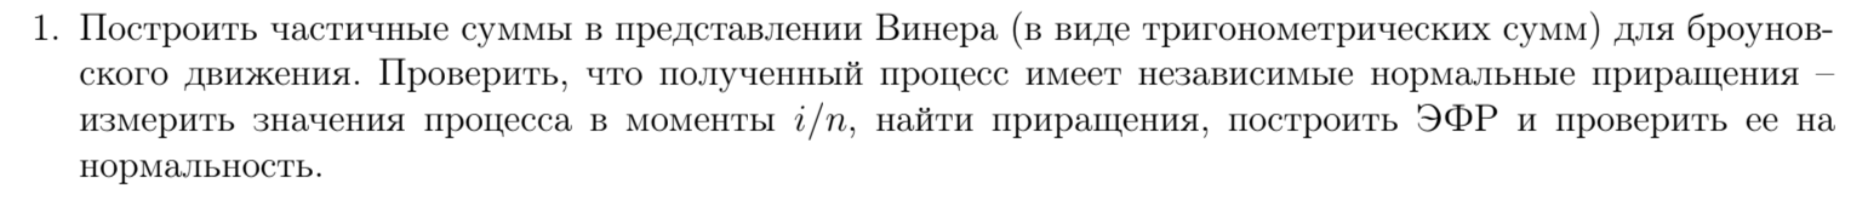

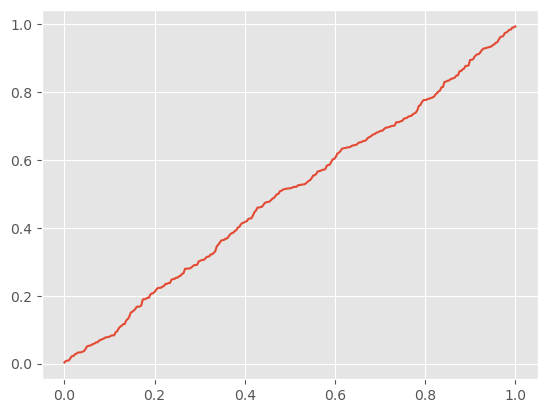

In [7]:
def X(t, sample, n):
    s = 0
    for i in range(1, n+1):
        s += sample[i-1]*((2**0.5) * np.sin( np.pi * (i - 1/2)*t ))/(i-1/2)/np.pi
    return s

n = 200
pvals = []
for j in range(300):
    sample = st.norm.rvs(size=700)
    incrs = [X(0, sample, 700)]
    for i in range(1, n+1):
        incrs.append(X(i/n, sample, 700) - X((i-1)/n, sample, 700))

    #сначала проверим, что все приращения нормальны
    norm_stat = st.shapiro(incrs).pvalue
    pvals.append(norm_stat)
    
plt.plot(np.linspace(0,1,300), np.sort(pvals))

Траектория
Проверка гипотезы
0.1878164253658171 => принимаем


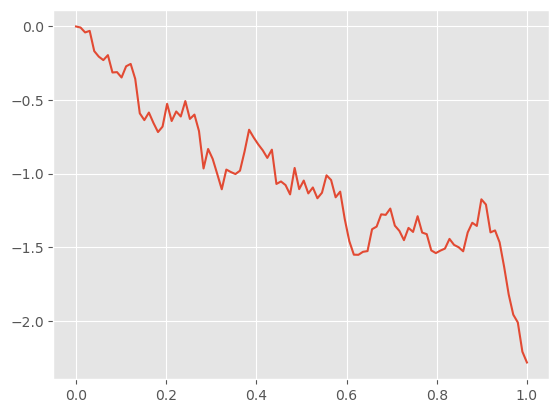

In [10]:
def X(t, sample, n):
    s = 0
    for i in range(1, n+1):
        s += sample[i-1]*((2**0.5) * np.sin( np.pi * (i - 1/2)*t ))/(i-1/2)/np.pi
    return s

print('Траектория')
n = 200
sample = st.norm(0,1).rvs(size=n)
print('Проверка гипотезы')
inc = [X(0, sample, 200)]
for i in range(1, n+1):
    inc.append(X(i/n, sample, 200) - X((i-1)/n, sample, 200))
    
inc = np.array(inc)
#сначала проверим, что все приращения нормальны
if(st.shapiro(inc).pvalue >= 0.05):
    print(st.shapiro(inc).pvalue, '=> принимаем')
else:
    print(st.shapiro(inc).pvalue, '=> отвергаем')
T = np.linspace(0, 1, 100)
X = [X(t, sample, n) for t in T]
plt.plot(T, X)

(array([0.39194819, 1.17584458, 3.13558554, 3.52753373, 5.74857348,
        5.0953265 , 3.91948192, 2.61298795, 0.39194819, 0.26129879]),
 array([-0.18043257, -0.14235261, -0.10427265, -0.06619268, -0.02811272,
         0.00996725,  0.04804721,  0.08612718,  0.12420714,  0.1622871 ,
         0.20036707]),
 <BarContainer object of 10 artists>)

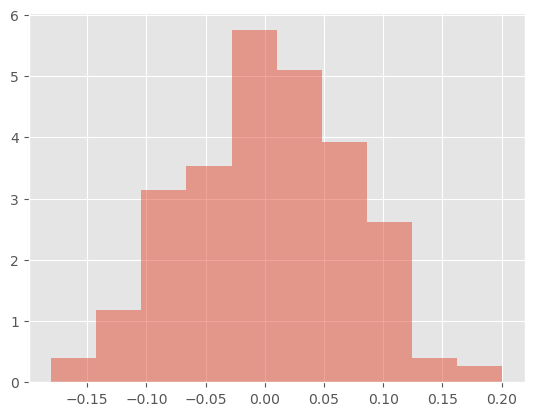

In [19]:
plt.hist(incrs, density=True, alpha=0.5)

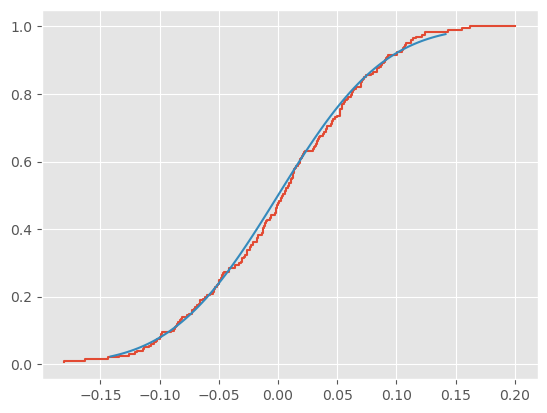

In [17]:
plt.step(ECDF(incrs).x, ECDF(incrs).y)
x = np.linspace(-2*(1/n)**0.5, 2*(1/n)**0.5, 100)
plt.plot(x, st.norm(0, scale=(1/n)**0.5).cdf(x))

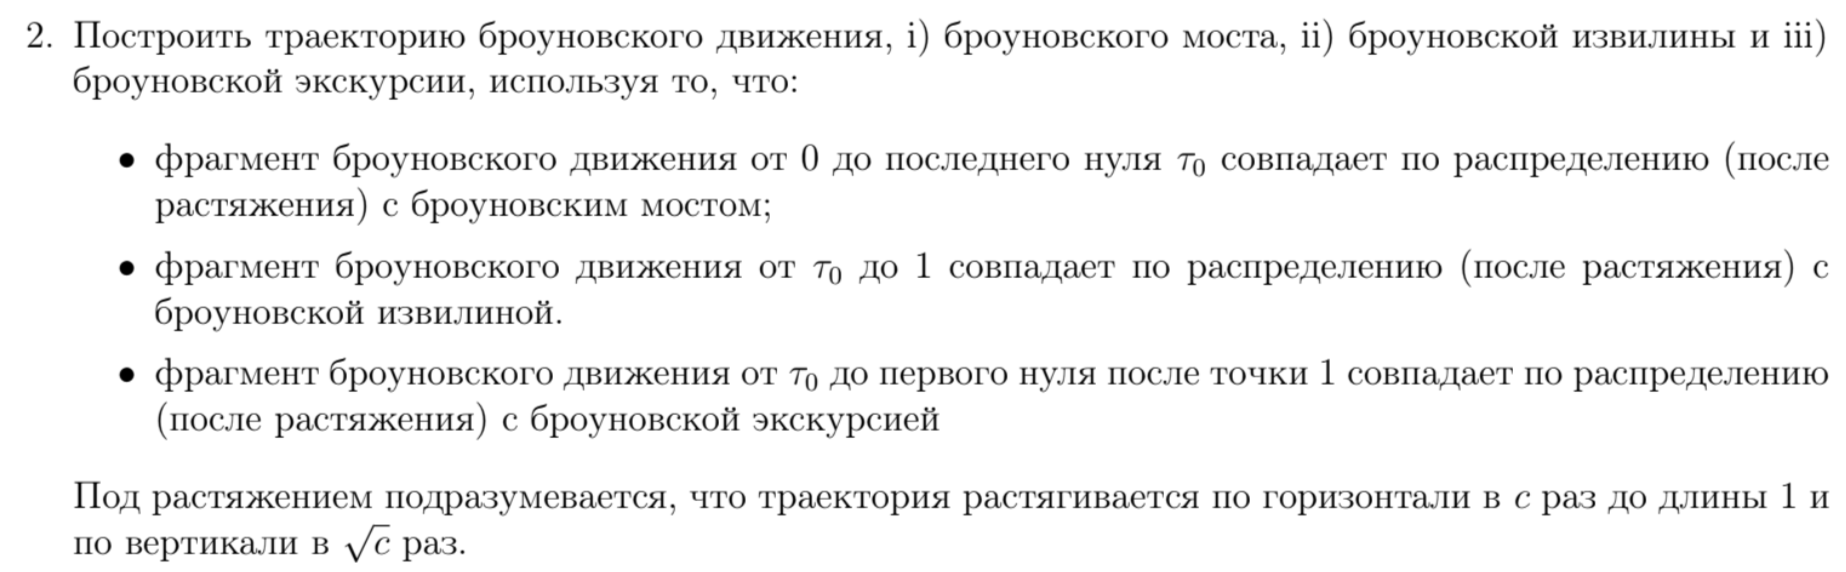

tao-0:  0.8058058058058059
tao-1:  1.4164164164164164


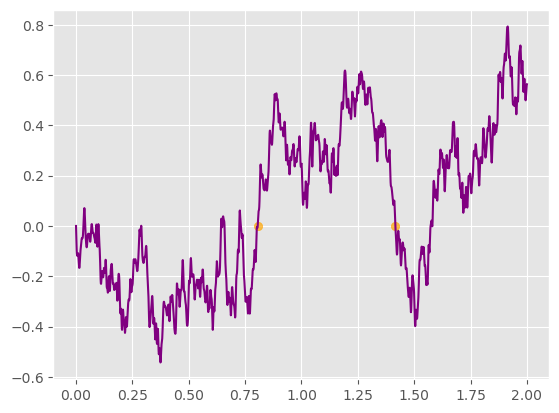

In [245]:
def X(t, sample, n):
    s = 0
    for i in range(1, n+1):
        s += sample[i-1]*((2**0.5) * np.sin( np.pi * (i - 1/2)*t ))/(i-1/2)/np.pi
    return s

def last_zero(sample, t, n):
    for i in range(len(t)-1, -1, -1):
        #очень плохой момент, надо доработать (глянуть поведение в окрестности)
        if abs(X(t[i], sample, n)) <= 0.01:
            return t[i]
    return -1

def next_zero(sample, t, n, last_point):
    for i in range(len(t)):
        #очень плохой момент, надо доработать (глянуть поведение в окрестности)
        if abs(X(t[i]-1, sample, n) + last_point) <= 0.01:
            return t[i]
    return 2

n = 300
sample1 = st.norm.rvs(size=n)
t = np.linspace(0, 1, 1000)
last_point = X(t[-1], sample1, n)
last_zero = last_zero(sample1, t, n)
plt.plot(t, X(t, sample1, n), color='purple')

sample2 = st.norm.rvs(size=n)
t = np.linspace(1, 2, 1000)
next_zero = next_zero(sample2, t, n, last_point)
plt.scatter((last_zero),(0),alpha=0.7, color='orange')
plt.scatter((next_zero), (0),alpha=0.7, color='orange')
plt.plot(t, X(t-1, sample2, n)+last_point, color='purple')

print('tao-0: ', last_zero)
print('tao-1: ', next_zero)

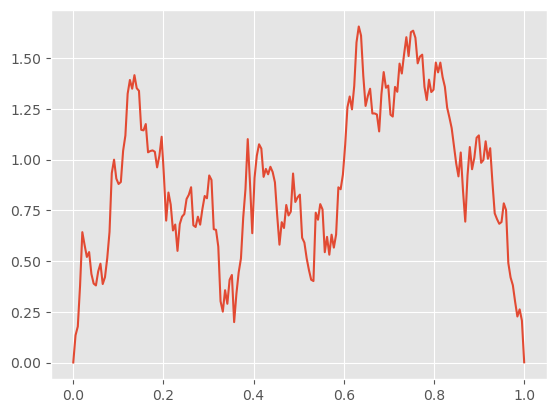

In [247]:
T = np.linspace(0, 1, 200)
val = []
for t in T:
    arg = last_zero + t*(next_zero - last_zero)
    if arg <= 1:
        val.append((X(arg, sample1, n))/(next_zero-last_zero)**2)
    else:
        val.append((X(arg-1, sample2, n)+last_point)/(next_zero-last_zero)**2)
plt.plot(T, val)

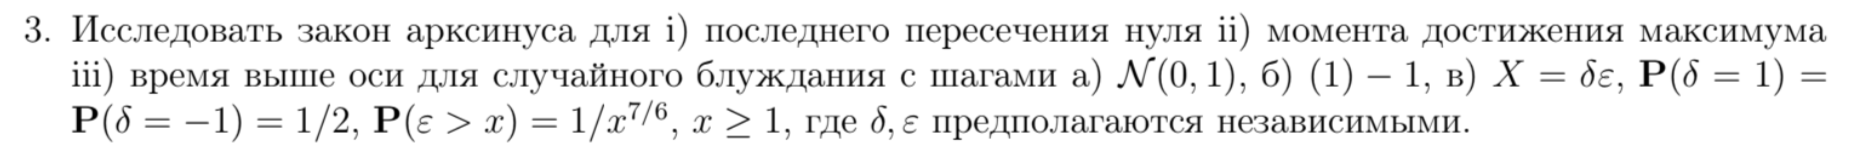

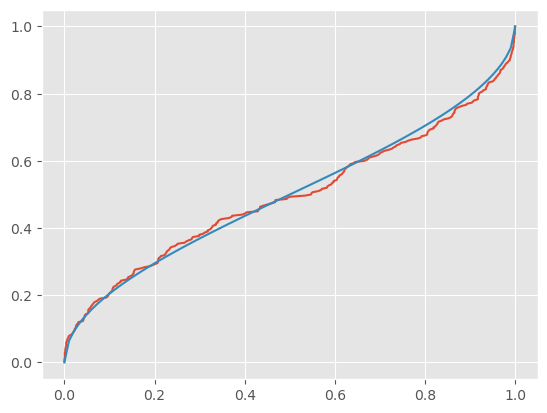

In [59]:
m = 1000 #число шагов
T = []
for j in range(300):
    sample = st.norm.rvs(size=m)
    s = 0
    t = 0

    for i in range(1, m):
        s += sample[i]
        if s >= 0:
            t += 1
    
    T.append(t/m)
    
    
ecdf = ECDF(T)
plt.plot(ecdf.x, ecdf.y)

x = np.linspace(0, 1, 100)
plt.plot(x, st.arcsine.cdf(x))

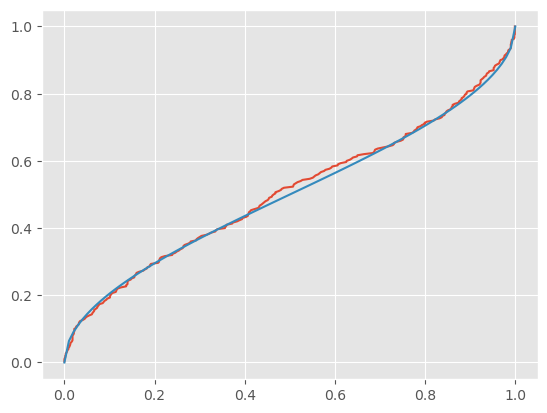

In [55]:
m = 1000 #число шагов
T = []
for j in range(300):
    sample = [(random.choices([-1, 1], weights=[0.5, 0.5]))[0] for i in range(m)]
    s = 0
    t = 0

    for i in range(1, m):
        s += sample[i]
        if s >= 0:
            t += 1
    
    T.append(t/m)
    
    
ecdf = ECDF(T)
plt.plot(ecdf.x, ecdf.y)

x = np.linspace(0, 1, 100)
plt.plot(x, st.arcsine.cdf(x))

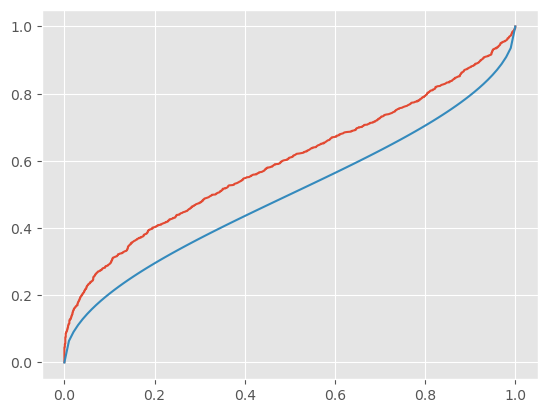

In [12]:
m = 1000 #число шагов
val = []
for j in range(1000):
    #массив дельт
    y = st.uniform(loc = 0, scale = 1).rvs(size = m)
    x = np.array([1 / (1-k) ** (6/7) for k in y])
    sample = (2 * ( st.bernoulli.rvs(size = m, p = 1b/4) - 0.5) + 1/2) * x
    
    s = 0
    t = 0
    for i in range(m):
        s += sample[i]
        if s > 0:
            t += 1
    val.append(t/m)
    
val = np.array(val)  
ecdf = ECDF(val)
plt.plot(ecdf.x, ecdf.y)

x = np.linspace(0, 1, 100)
plt.plot(x, st.arcsine.cdf(x))